In [1]:
from pyedflib import highlevel
import pyedflib as plib
import numpy as np
import matplotlib.pyplot as plt

def read_file_signal(file_path, index):
    f = plib.EdfReader(file_path)
    signal = f.readSignal(index)
    f.close()
    return signal

def signal_labels(file_path):
    f = plib.EdfReader(file_path)
    labels = f.getSignalLabels()
    f.close()
    return labels

def combined_signal(file_list, index):
    combined_signals = []
    for file in file_list:
        temp = read_file_signal(file, index)
        combined_signals.append(temp)
    return np.concatenate(combined_signals)

edf_files_severe = [
    "c:\\Users\\anany\\Downloads\\00000066-297469[001].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[002].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[003].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[004].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[005].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[006].edf",
    "c:\\Users\\anany\\Downloads\\00000066-297469[007].edf"
]

edf_files_normal = [
    "C:\\Users\\anany\\Downloads\\00000064-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000064-297469[009].edf"
]

edf_files_moderate = [
    "C:\\Users\\anany\\Downloads\\00000074-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000074-297469[009].edf"
]

edf_files_mild = [
    "C:\\Users\\anany\\Downloads\\00000067-297469[001].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[002].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[003].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[004].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[005].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[006].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[007].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[008].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[009].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[010].edf",
    "C:\\Users\\anany\\Downloads\\00000067-297469[011].edf",
]

labels = signal_labels(edf_files_normal[0])
print(labels)
labels[16] = "Flow patient 1"
labels[17] = "Flow patient 2"
labels[23] = "Flow patient 3"
cv_dict = {}

['EEG F3-A2', 'EEG F4-A1', 'EEG A1-A2', 'EEG C3-A2', 'EEG C4-A1', 'EEG O1-A2', 'EEG O2-A1', 'EOG LOC-A2', 'EOG ROC-A2', 'EMG Chin', 'Leg 1', 'Leg 2', 'ECG I', 'RR', 'ECG II', 'Snore', 'Flow Patient', 'Flow Patient', 'Effort THO', 'Effort ABD', 'SpO2', 'Pleth', 'Body', 'Flow Patient', 'xPAP CPAP', 'xPAP IPAP', 'xPAP EPAP', 'Leak Total', 'PulseRate', 'PressCheck', 'ECG IIHF', 'Technical']


In [2]:
import statistics as stat
import matplotlib.pyplot as plt

def plot_signal(label, signal):
    plt.figure(figsize=(20, 10))
    plt.plot(signal)
    plt.title(f"{label} signal")
    plt.xlabel("time")
    plt.ylabel("amplitude")
    # plt.ylim(-300, 300)
    plt.show()

def thresholding(signal, threshold, replace_with):
    mean = signal.mean()
    std = stat.stdev(signal)
    lower_limit = mean - threshold * std
    upper_limit = mean + threshold * std
    filtered_signal = np.where((signal >= lower_limit) & (signal <= upper_limit), signal, replace_with)
    return filtered_signal

def resample_signal(signal, num_samples):
    original_indices = np.linspace(0, len(signal) - 1, num=len(signal))
    resampled_indices = np.linspace(0, len(signal) - 1, num=num_samples)
    resampled_signal = np.interp(resampled_indices, original_indices, signal)
    return resampled_signal

In [3]:
normal_dnd_signals = []

for i in range(32):
    combined_sig = combined_signal(edf_files_normal, i)
    resampled_signal = resample_signal(combined_sig, 25200)
    if i in [23, 37]:
        thresholded_signal = thresholding(resampled_signal, 2, 0)
    else:
        thresholded_signal = thresholding(resampled_signal, 2, resampled_signal.mean())
    normal_dnd_signals.append(thresholded_signal)

In [4]:
mild_dnd_signals = []

for i in range(32):
    combined_sig = combined_signal(edf_files_mild, i)
    resampled_signal = resample_signal(combined_sig, 25200)
    thresholded_signal = thresholding(resampled_signal, 2, resampled_signal.mean())
    mild_dnd_signals.append(thresholded_signal)

In [5]:
moderate_dnd_signals = []

for i in range(32):
    combined_sig = combined_signal(edf_files_moderate, i)
    resampled_signal = resample_signal(combined_sig, 25200)
    thresholded_signal = thresholding(resampled_signal, 2, resampled_signal.mean())
    moderate_dnd_signals.append(thresholded_signal)

In [6]:
severe_dnd_signals = []

for i in range(32):
    combined_sig = combined_signal(edf_files_severe, i)
    resampled_signal = resample_signal(combined_sig, 25200)
    thresholded_signal = thresholding(resampled_signal, 2, resampled_signal.mean())
    severe_dnd_signals.append(thresholded_signal)

In [7]:
means_dict = {}

for i in range(32):
    if i in [22, 29, 31]:
        continue 
    means_dict[labels[i]] = []
    m1 = normal_dnd_signals[i].mean()
    m2 = mild_dnd_signals[i].mean()
    m3 = moderate_dnd_signals[i].mean()
    m4 = severe_dnd_signals[i].mean()
    means_dict[labels[i]].append(m1)
    means_dict[labels[i]].append(m2)
    means_dict[labels[i]].append(m3)
    means_dict[labels[i]].append(m4)

print(means_dict)

{'EEG F3-A2': [-74.93241226467259, -5.296784384128023, -5.176770969935831, -5.024173166644779], 'EEG F4-A1': [-12.821076532476669, -13.40606821147933, -13.338684644331138, -13.201809758302106], 'EEG A1-A2': [-0.08196384435917446, -0.010711711718939138, 0.08788695517719733, 0.04324543114073661], 'EEG C3-A2': [-6.021468026824774, -6.37647339783975, -6.545689312621402, -6.236431510355804], 'EEG C4-A1': [8.626147873002076, 7.974600291807577, 8.152048154547678, 8.060310381993865], 'EEG O1-A2': [304.0441207315584, 310.47287564633933, 303.18674462560193, 309.2578869573908], 'EEG O2-A1': [306.1250491964958, 311.4833916870556, 306.2834183419753, 310.79063270785804], 'EOG LOC-A2': [14.836409657459196, 15.437862235508248, 14.820728245344416, 16.09613963523709], 'EOG ROC-A2': [-5.3219551065099235, -5.586119055778409, -5.525449421682477, -5.557108368300446], 'EMG Chin': [-0.21312107340628084, -0.128904258421095, -0.06377495964296279, -0.14655176524454658], 'Leg 1': [-0.14169521126163837, -0.0625763

In [8]:
cv_dict = {}

for channel, mean_vals in means_dict.items():
    var = stat.variance(mean_vals)
    mean = abs((mean_vals[0]+mean_vals[1]+mean_vals[2]+mean_vals[3])*0.25)
    cv = var / mean
    cv_dict[channel] = cv

sorted_channels = sorted(cv_dict, key=cv_dict.get, reverse=True)

top_5 = sorted_channels[:5]
print(top_5)
for channel in sorted_channels:
    print(f"{channel}: {cv_dict[channel]}")

['EEG F3-A2', 'Leak Total', 'Flow patient 2', 'ECG II', 'ECG IIHF']
EEG F3-A2: 53.825136677918756
Leak Total: 17.172287722284526
Flow patient 2: 11.895927668253275
ECG II: 8.973274593117392
ECG IIHF: 8.482694099200765
xPAP CPAP: 5.401089628769526
xPAP IPAP: 5.401089628769526
xPAP EPAP: 3.0973138009039407
ECG I: 1.5223713949124194
EEG A1-A2: 0.5567234639219344
Pleth: 0.5166345977809575
PulseRate: 0.32338613666888216
Flow patient 1: 0.19301668601339816
Flow patient 3: 0.1691033209894254
Effort ABD: 0.06404596479388612
EEG O1-A2: 0.04364983389754938
SpO2: 0.031259879703929905
EMG Chin: 0.027297485039179777
EEG O2-A1: 0.026549120741346452
EOG LOC-A2: 0.023912876132953287
Effort THO: 0.022175786664820393
Leg 2: 0.015389022630374912
Leg 1: 0.011107229428013631
EEG C4-A1: 0.010328257460724244
Snore: 0.008503991482833756
RR: 0.008237761336074914
EEG C3-A2: 0.007822752881485241
EEG F4-A1: 0.0051804983743322704
EOG ROC-A2: 0.002607387525969707


In [9]:
print(cv_dict)

{'EEG F3-A2': 53.825136677918756, 'EEG F4-A1': 0.0051804983743322704, 'EEG A1-A2': 0.5567234639219344, 'EEG C3-A2': 0.007822752881485241, 'EEG C4-A1': 0.010328257460724244, 'EEG O1-A2': 0.04364983389754938, 'EEG O2-A1': 0.026549120741346452, 'EOG LOC-A2': 0.023912876132953287, 'EOG ROC-A2': 0.002607387525969707, 'EMG Chin': 0.027297485039179777, 'Leg 1': 0.011107229428013631, 'Leg 2': 0.015389022630374912, 'ECG I': 1.5223713949124194, 'RR': 0.008237761336074914, 'ECG II': 8.973274593117392, 'Snore': 0.008503991482833756, 'Flow patient 1': 0.19301668601339816, 'Flow patient 2': 11.895927668253275, 'Effort THO': 0.022175786664820393, 'Effort ABD': 0.06404596479388612, 'SpO2': 0.031259879703929905, 'Pleth': 0.5166345977809575, 'Flow patient 3': 0.1691033209894254, 'xPAP CPAP': 5.401089628769526, 'xPAP IPAP': 5.401089628769526, 'xPAP EPAP': 3.0973138009039407, 'Leak Total': 17.172287722284526, 'PulseRate': 0.32338613666888216, 'ECG IIHF': 8.482694099200765}


In [10]:
vmr = {'EEG F3-A2': 184.37285056369444, 'EEG F4-A1': 164.86821642156684, 'EEG A1-A2': 4595.084953753323, 'EEG C3-A2': 201.18650985088325, 'EEG C4-A1': 509.20510606433686, 'EEG O1-A2': 15.192553317614426, 'EEG O2-A1': 14.527331683005768, 'EOG LOC-A2': 216.60646170439276, 'EOG ROC-A2': 317.77373069544694, 'EMG Chin': 2664.898964706699, 'Leg 1': 215.16137842210057, 'Leg 2': 181.71505949540204, 'ECG I': 7196.988048898392, 'RR': 3.0278950527298356, 'ECG II': 8972.544958847033, 'Snore': 1137.7298329570567, 'Flow patient 1': 147380.3476510301, 'Flow patient 2': 8911.47864145931, 'Effort THO': 1587.5044588747692, 'Effort ABD': 5866.722411154047, 'SpO2': 2.683267675732929, 'Pleth': 109877.07751791978, 'Flow patient 3': 4415.7245054078285, 'xPAP CPAP': 10.376277538186075, 'xPAP IPAP': 10.376277538186075, 'xPAP EPAP': 6.576235558750487, 'Leak Total': 3259.3271650326597, 'PulseRate': 1.3839885623207064, 'ECG IIHF': 8719.146939715141}
downsampled_vmr = {'EEG F3-A2': 182.428689326025, 'EEG F4-A1': 155.4206859818985, 'EEG A1-A2': 3490.3757582807016, 'EEG C3-A2': 206.42817562199613, 'EEG C4-A1': 510.62372770331064, 'EEG O1-A2': 14.388575671451488, 'EEG O2-A1': 14.152747483302848, 'EOG LOC-A2': 219.86870995080065, 'EOG ROC-A2': 281.8797117960404, 'EMG Chin': 2036.861430416343, 'Leg 1': 133.5932183594905, 'Leg 2': 156.66833635010613, 'ECG I': 7120.12687420609, 'RR': 2.636915429510604, 'ECG II': 8821.70980461927, 'Snore': 531.2294223510615, 'Flow patient 1': 14217.660126001356, 'Flow patient 2': 52995.5121821811, 'Effort THO': 64884.28358235983, 'Effort ABD': 15621.006473153351, 'SpO2': 2.6839037946938578, 'Pleth': 5639.936646172113, 'Flow patient 3': 3223.5945718820335, 'xPAP CPAP': 6.930288717391482, 'xPAP IPAP': 6.930288717391482, 'xPAP EPAP': 3.1302467379558947, 'Leak Total': 3259.3897038244036, 'PulseRate': 1.3860318084170986, 'ECG IIHF': 8191.784191811686}
denoised_vmr = {'EEG F3-A2': 178.9858819656348, 'EEG F4-A1': 28.55851647783711, 'EEG A1-A2': 86.287634521907, 'EEG C3-A2': 66.70464028484534, 'EEG C4-A1': 38.078741298538674, 'EEG O1-A2': 1.9629338856713692, 'EEG O2-A1': 1.6586734252464963, 'EOG LOC-A2': 32.300840901376155, 'EOG ROC-A2': 77.8204806260048, 'EMG Chin': 357.38278765900566, 'Leg 1': 57.565352470500414, 'Leg 2': 79.37724290480233, 'ECG I': 1149.6739346098218, 'RR': 0.5686322754705704, 'ECG II': 2499.5573949269524, 'Snore': 69.02706917092397, 'Flow patient 1': 1168.5264766191992, 'Flow patient 2': 342.4399182735728, 'Effort THO': 595.2913532753801, 'Effort ABD': 138.19790850630432, 'SpO2': 0.37267010913635984, 'Pleth': 1659.4622845738559, 'Flow patient 3': 337.0012848930209, 'xPAP CPAP': 10.376277538186075, 'xPAP IPAP': 10.376277538186075, 'xPAP EPAP': 6.576235558750487, 'Leak Total': 34.076145293444654, 'PulseRate': 0.6362061167366178, 'ECG IIHF': 2400.02115907236}
dnd_vmr = {'EEG F3-A2': 171.62354309594872, 'EEG F4-A1': 27.121084956435997, 'EEG A1-A2': 110.22285797630082, 'EEG C3-A2': 64.3183371725111, 'EEG C4-A1': 35.66133750570077, 'EEG O1-A2': 1.8922748597359185, 'EEG O2-A1': 1.3433544167131257, 'EOG LOC-A2': 32.13866453183014, 'EOG ROC-A2': 78.67466566371046, 'EMG Chin': 267.18535128463895, 'Leg 1': 94.64253476255857, 'Leg 2': 115.71429246206594, 'ECG I': 1139.6612116393183, 'RR': 0.7466902785314621, 'ECG II': 2516.707202369467, 'Snore': 343.4504521728328, 'Flow patient 1': 1306.215918392189, 'Flow patient 2': 362.8949145505953, 'Effort THO': 280.25710525730085, 'Effort ABD': 179.32740232912204, 'SpO2': 0.3725922041744621, 'Pleth': 1949.7916498130055, 'Flow patient 3': 281.1518655252803, 'xPAP CPAP': 6.930288717391482, 'xPAP IPAP': 6.930288717391482, 'xPAP EPAP': 3.1302467379558947, 'Leak Total': 34.023725168511746, 'PulseRate': 0.6376619931231701, 'ECG IIHF': 2325.5203800319114}
downsampled_cv = {'EEG F3-A2': 50.141078538246326, 'EEG F4-A1': 0.14409274326542937, 'EEG A1-A2': 3.517860616359823, 'EEG C3-A2': 0.2325221850200595, 'EEG C4-A1': 0.25917582605867856, 'EEG O1-A2': 0.12610720706510728, 'EEG O2-A1': 0.09072982681115203, 'EOG LOC-A2': 0.3430003069363866, 'EOG ROC-A2': 0.3716484786838994, 'EMG Chin': 0.6110439338053534, 'Leg 1': 0.5951759226108382, 'Leg 2': 0.5527777184639167, 'ECG I': 30.6725796034319, 'RR': 0.0180549439131068, 'ECG II': 53.15490756297912, 'Snore': 1.0270861418328747, 'Flow patient 1': 0.9176564857599058, 'Flow patient 2': 14.271708329988064, 'Effort THO': 0.9944267324508562, 'Effort ABD': 0.9555097539475177, 'SpO2': 0.07225955518483519, 'Pleth': 0.7656739887763762, 'Flow patient 3': 1.5388390541072037, 'xPAP CPAP': 5.363062267916053, 'xPAP IPAP': 5.363062267916053, 'xPAP EPAP': 3.0691842705461045, 'Leak Total': 18.461288353632515, 'PulseRate': 0.30948217576403103, 'ECG IIHF': 55.247344034762314}
denoised_cv = {'EEG F3-A2': 54.011808856016366, 'EEG F4-A1': 0.0027262800670674824, 'EEG A1-A2': 0.8078498027638706, 'EEG C3-A2': 0.00802366142603763, 'EEG C4-A1': 0.004014930661443308, 'EEG O1-A2': 0.023480239090483808, 'EEG O2-A1': 0.01752644887240493, 'EOG LOC-A2': 0.027536879665679824, 'EOG ROC-A2': 0.0007038258441686124, 'EMG Chin': 0.019393564115421442, 'Leg 1': 0.0015855763207000488, 'Leg 2': 0.000572157981468642, 'ECG I': 1.4957442814538235, 'RR': 0.003089613345273817, 'ECG II': 8.439446549739225, 'Snore': 0.003935671693029385, 'Flow patient 1': 0.17241666021822913, 'Flow patient 2': 12.02473766560137, 'Effort THO': 0.027053291022882443, 'Effort ABD': 0.07243648340683782, 'SpO2': 0.03127888460418515, 'Pleth': 0.4451875684473358, 'Flow patient 3': 0.176921215154785, 'xPAP CPAP': 5.401406161218076, 'xPAP IPAP': 5.401406161218076, 'xPAP EPAP': 3.09755584884555, 'Leak Total': 17.167653665619635, 'PulseRate': 0.3238263671229323, 'ECG IIHF': 8.803556422717417}
dnd_cv = {'EEG F3-A2': 53.825136677918756, 'EEG F4-A1': 0.0051804983743322704, 'EEG A1-A2': 0.5567234639219344, 'EEG C3-A2': 0.007822752881485241, 'EEG C4-A1': 0.010328257460724244, 'EEG O1-A2': 0.04364983389754938, 'EEG O2-A1': 0.026549120741346452, 'EOG LOC-A2': 0.023912876132953287, 'EOG ROC-A2': 0.002607387525969707, 'EMG Chin': 0.027297485039179777, 'Leg 1': 0.011107229428013631, 'Leg 2': 0.015389022630374912, 'ECG I': 1.5223713949124194, 'RR': 0.008237761336074914, 'ECG II': 8.973274593117392, 'Snore': 0.008503991482833756, 'Flow patient 1': 0.19301668601339816, 'Flow patient 2': 11.895927668253275, 'Effort THO': 0.022175786664820393, 'Effort ABD': 0.06404596479388612, 'SpO2': 0.031259879703929905, 'Pleth': 0.5166345977809575, 'Flow patient 3': 0.1691033209894254, 'xPAP CPAP': 5.401089628769526, 'xPAP IPAP': 5.401089628769526, 'xPAP EPAP': 3.0973138009039407, 'Leak Total': 17.172287722284526, 'PulseRate': 0.32338613666888216, 'ECG IIHF': 8.482694099200765}

In [11]:
print(len(vmr))
print(len(downsampled_vmr))
print(len(denoised_vmr))
print(len(dnd_vmr))
print(len(downsampled_cv))
print(len(denoised_cv))
print(len(dnd_cv))

29
29
29
29
29
29
29


In [14]:
import math

def log_transform(value):
    """
    Apply a natural logarithm transformation to a list of values.

    Parameters:
    values (list of float): The list of values to transform.

    Returns:
    list of float: The list of log-transformed values.
    """
    return math.log(value)

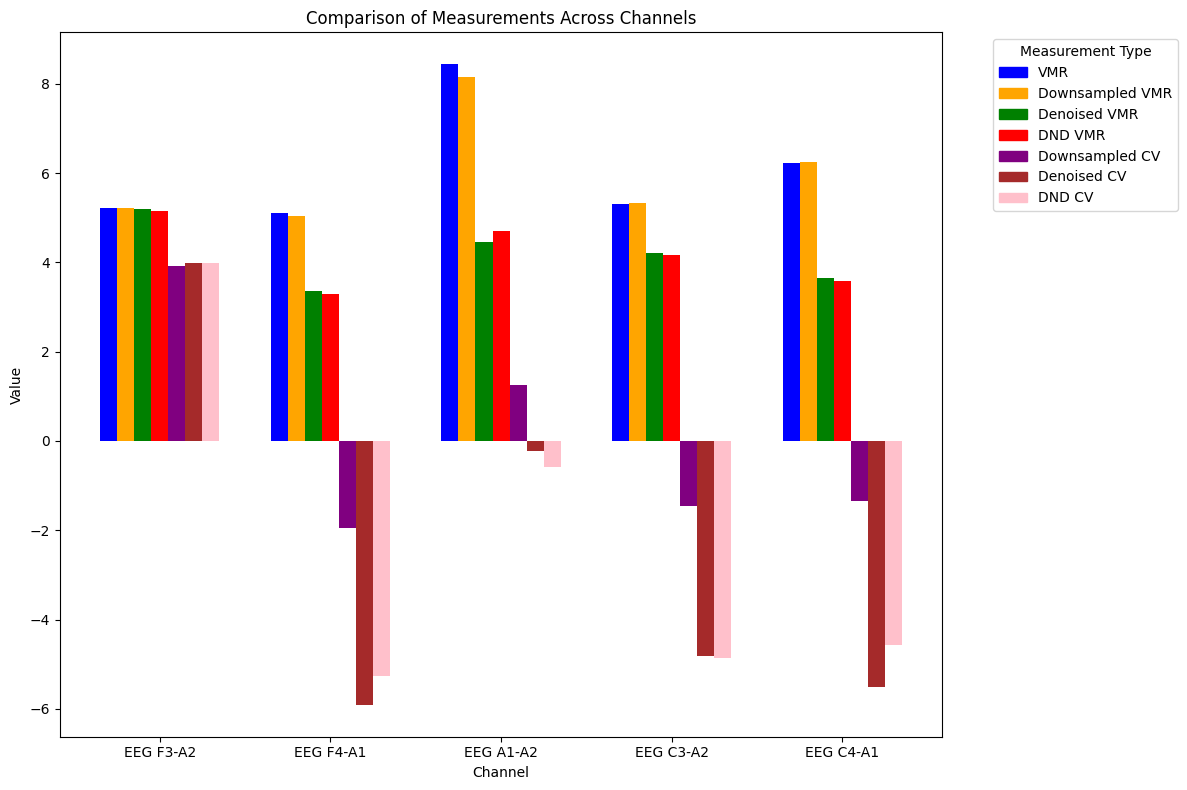

In [15]:
import matplotlib.patches as mpatches

channels = list(vmr.keys())

# Define width of each bar and spacing between clusters
bar_width = 0.1
cluster_spacing = 0.3

# Define labels and colors
labels = ['VMR', 'Downsampled VMR', 'Denoised VMR', 'DND VMR', 'Downsampled CV', 'Denoised CV', 'DND CV']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# X locations for the clusters
x = np.arange(5) * (len(labels) * bar_width + cluster_spacing)

# Plot bars for each channel
for i, channel in enumerate(channels[:5]):
    # Values for the current channel
    values = [
        log_transform(vmr[channel]),
        log_transform(downsampled_vmr[channel]),
        log_transform(denoised_vmr[channel]),
        log_transform(dnd_vmr[channel]),
        log_transform(downsampled_cv[channel]),
        log_transform(denoised_cv[channel]),
        log_transform(dnd_cv[channel])
    ]
    
    # Plot bars with adjusted positions for each channel
    bar_positions = x[i] + np.arange(len(labels)) * bar_width
    ax.bar(bar_positions, values, bar_width, label=f'Channel: {channel}', color=colors)

# Set x-ticks and labels
ax.set_xticks(x + (len(labels) - 1) * bar_width / 2)
ax.set_xticklabels(channels[:5])
ax.set_xlabel('Channel')
ax.set_ylabel('Value')
ax.set_title('Comparison of Measurements Across Channels')
legend_patches = [mpatches.Patch(color=colors[j], label=labels[j]) for j in range(len(labels))]
ax.legend(handles=legend_patches, title='Measurement Type', bbox_to_anchor=(1.05, 1), loc='upper left')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

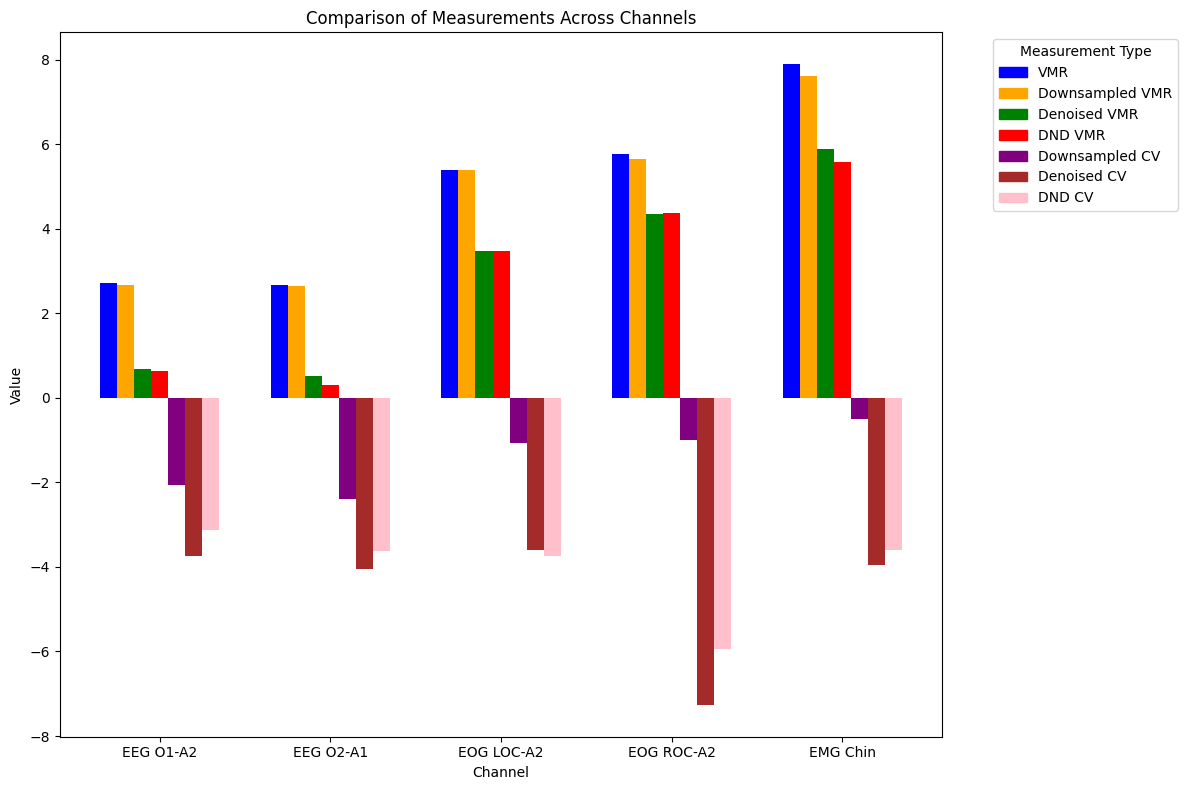

In [16]:
channels = list(vmr.keys())

# Define width of each bar and spacing between clusters
bar_width = 0.1
cluster_spacing = 0.3

# Define labels and colors
labels = ['VMR', 'Downsampled VMR', 'Denoised VMR', 'DND VMR', 'Downsampled CV', 'Denoised CV', 'DND CV']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# X locations for the clusters
x = np.arange(5) * (len(labels) * bar_width + cluster_spacing)

# Plot bars for each channel
for i, channel in enumerate(channels[5:10]):
    # Values for the current channel
    values = [
        log_transform(vmr[channel]),
        log_transform(downsampled_vmr[channel]),
        log_transform(denoised_vmr[channel]),
        log_transform(dnd_vmr[channel]),
        log_transform(downsampled_cv[channel]),
        log_transform(denoised_cv[channel]),
        log_transform(dnd_cv[channel])
    ]
    
    # Plot bars with adjusted positions for each channel
    bar_positions = x[i] + np.arange(len(labels)) * bar_width
    ax.bar(bar_positions, values, bar_width, label=f'Channel: {channel}', color=colors)

# Set x-ticks and labels
ax.set_xticks(x + (len(labels) - 1) * bar_width / 2)
ax.set_xticklabels(channels[5:10])
ax.set_xlabel('Channel')
ax.set_ylabel('Value')
ax.set_title('Comparison of Measurements Across Channels')
legend_patches = [mpatches.Patch(color=colors[j], label=labels[j]) for j in range(len(labels))]
ax.legend(handles=legend_patches, title='Measurement Type', bbox_to_anchor=(1.05, 1), loc='upper left')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

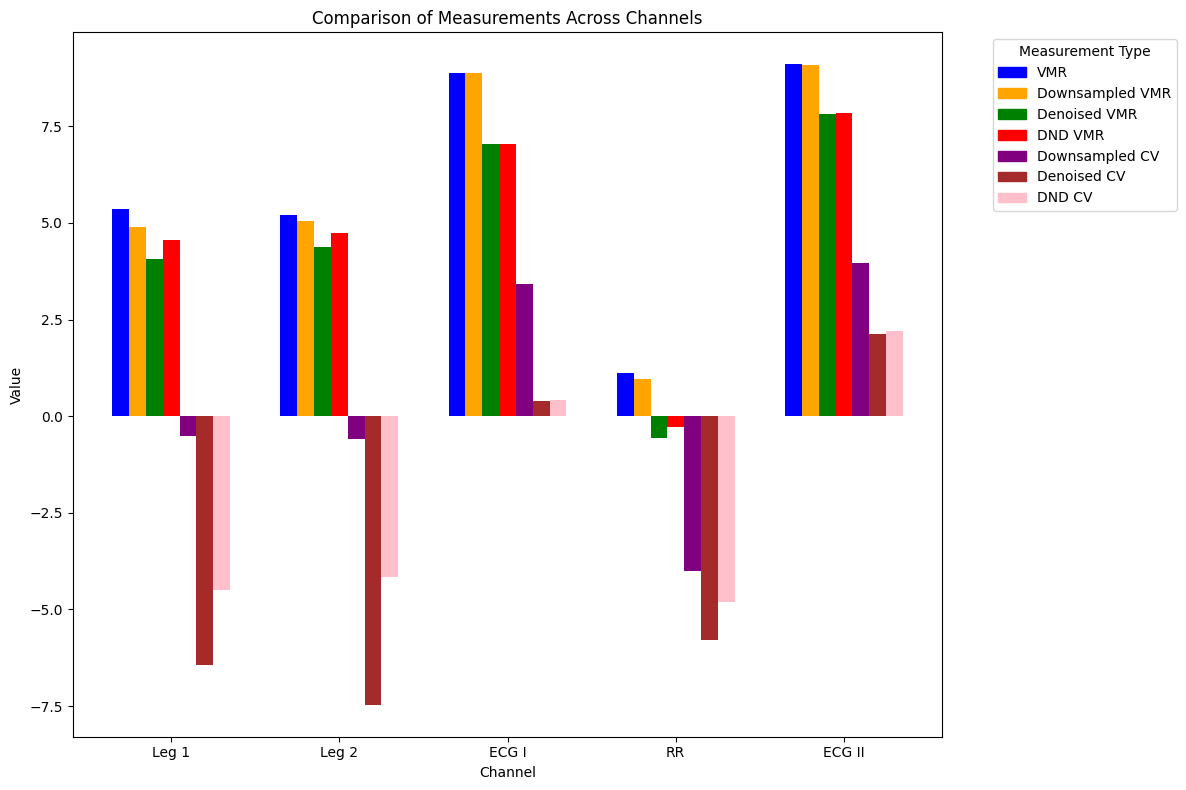

In [17]:
channels = list(vmr.keys())

# Define width of each bar and spacing between clusters
bar_width = 0.1
cluster_spacing = 0.3

# Define labels and colors
labels = ['VMR', 'Downsampled VMR', 'Denoised VMR', 'DND VMR', 'Downsampled CV', 'Denoised CV', 'DND CV']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# X locations for the clusters
x = np.arange(5) * (len(labels) * bar_width + cluster_spacing)

# Plot bars for each channel
for i, channel in enumerate(channels[10:15]):
    # Values for the current channel
    values = [
        log_transform(vmr[channel]),
        log_transform(downsampled_vmr[channel]),
        log_transform(denoised_vmr[channel]),
        log_transform(dnd_vmr[channel]),
        log_transform(downsampled_cv[channel]),
        log_transform(denoised_cv[channel]),
        log_transform(dnd_cv[channel])
    ]
    
    # Plot bars with adjusted positions for each channel
    bar_positions = x[i] + np.arange(len(labels)) * bar_width
    ax.bar(bar_positions, values, bar_width, label=f'Channel: {channel}', color=colors)

# Set x-ticks and labels
ax.set_xticks(x + (len(labels) - 1) * bar_width / 2)
ax.set_xticklabels(channels[10:15])
ax.set_xlabel('Channel')
ax.set_ylabel('Value')
ax.set_title('Comparison of Measurements Across Channels')
legend_patches = [mpatches.Patch(color=colors[j], label=labels[j]) for j in range(len(labels))]
ax.legend(handles=legend_patches, title='Measurement Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

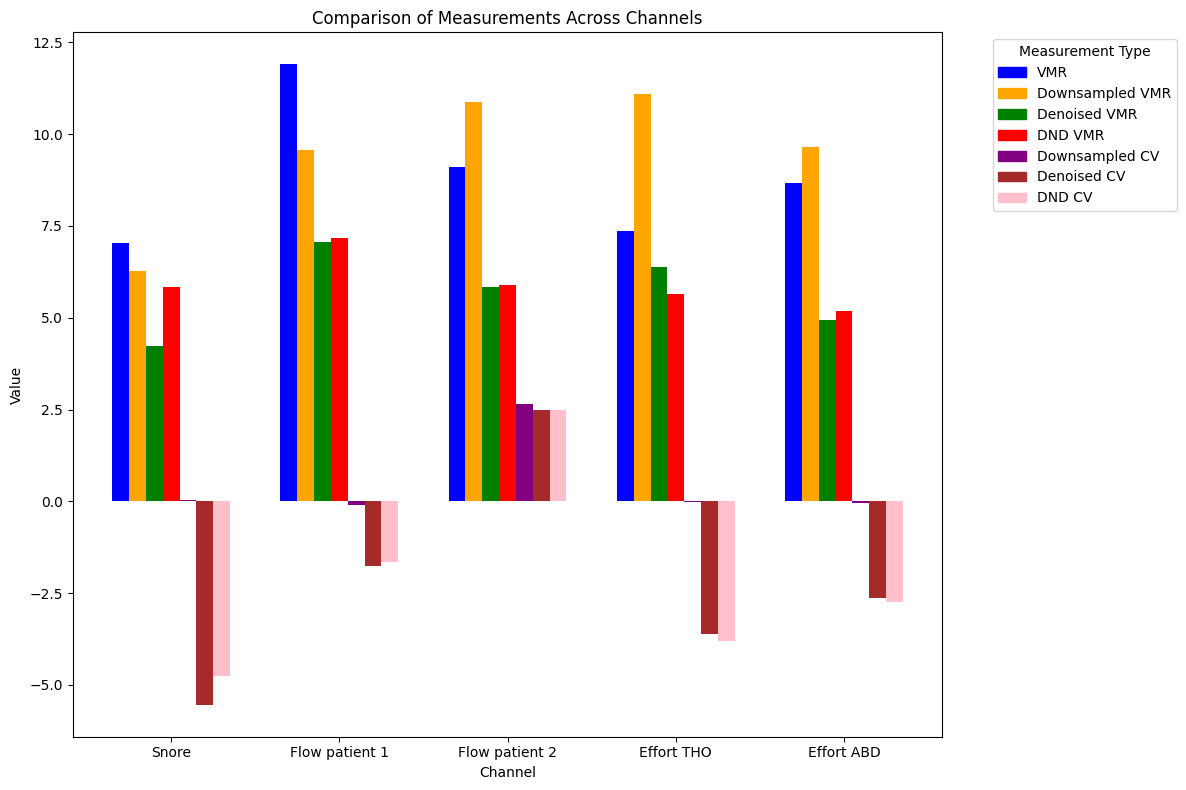

In [18]:
channels = list(vmr.keys())

# Define width of each bar and spacing between clusters
bar_width = 0.1
cluster_spacing = 0.3

# Define labels and colors
labels = ['VMR', 'Downsampled VMR', 'Denoised VMR', 'DND VMR', 'Downsampled CV', 'Denoised CV', 'DND CV']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# X locations for the clusters
x = np.arange(5) * (len(labels) * bar_width + cluster_spacing)

# Plot bars for each channel
for i, channel in enumerate(channels[15:20]):
    # Values for the current channel
    values = [
        log_transform(vmr[channel]),
        log_transform(downsampled_vmr[channel]),
        log_transform(denoised_vmr[channel]),
        log_transform(dnd_vmr[channel]),
        log_transform(downsampled_cv[channel]),
        log_transform(denoised_cv[channel]),
        log_transform(dnd_cv[channel])
    ]
    
    # Plot bars with adjusted positions for each channel
    bar_positions = x[i] + np.arange(len(labels)) * bar_width
    ax.bar(bar_positions, values, bar_width, label=f'Channel: {channel}', color=colors)

# Set x-ticks and labels
ax.set_xticks(x + (len(labels) - 1) * bar_width / 2)
ax.set_xticklabels(channels[15:20])
ax.set_xlabel('Channel')
ax.set_ylabel('Value')
ax.set_title('Comparison of Measurements Across Channels')
legend_patches = [mpatches.Patch(color=colors[j], label=labels[j]) for j in range(len(labels))]
ax.legend(handles=legend_patches, title='Measurement Type', bbox_to_anchor=(1.05, 1), loc='upper left')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

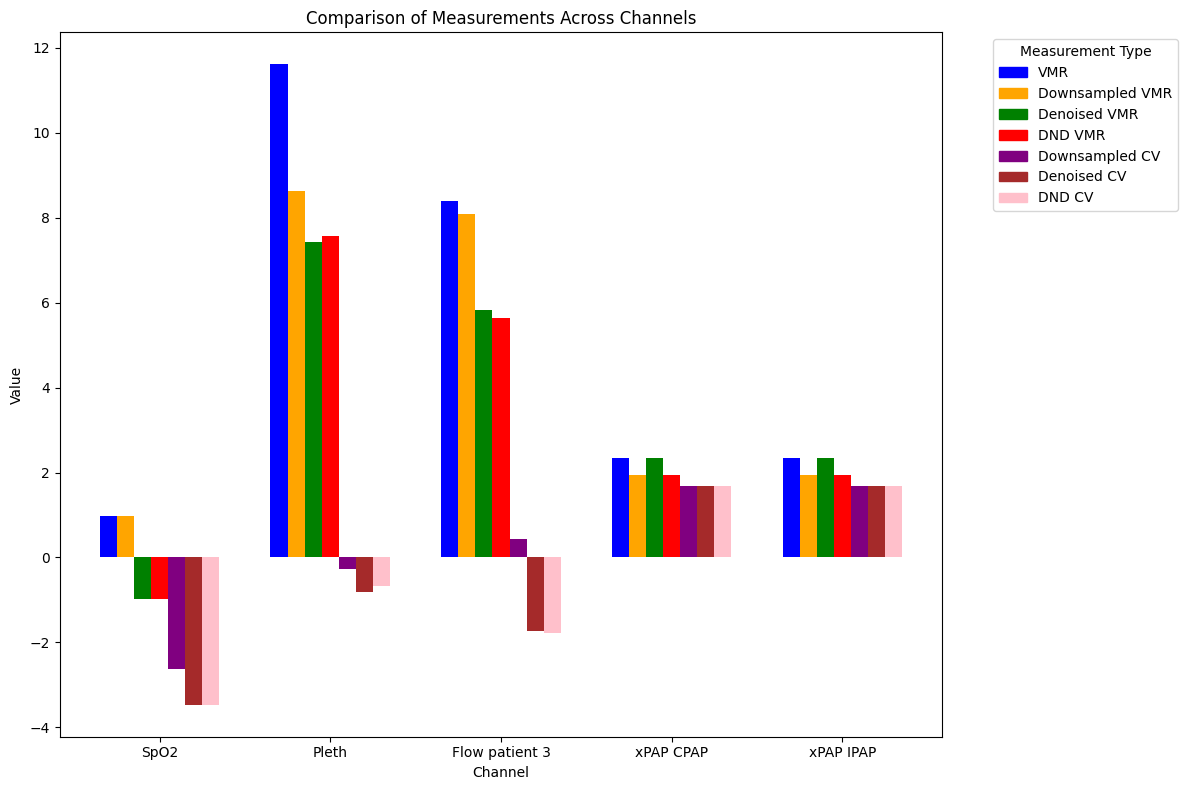

In [19]:
channels = list(vmr.keys())

# Define width of each bar and spacing between clusters
bar_width = 0.1
cluster_spacing = 0.3

# Define labels and colors
labels = ['VMR', 'Downsampled VMR', 'Denoised VMR', 'DND VMR', 'Downsampled CV', 'Denoised CV', 'DND CV']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# X locations for the clusters
x = np.arange(5) * (len(labels) * bar_width + cluster_spacing)

# Plot bars for each channel
for i, channel in enumerate(channels[20:25]):
    # Values for the current channel
    values = [
        log_transform(vmr[channel]),
        log_transform(downsampled_vmr[channel]),
        log_transform(denoised_vmr[channel]),
        log_transform(dnd_vmr[channel]),
        log_transform(downsampled_cv[channel]),
        log_transform(denoised_cv[channel]),
        log_transform(dnd_cv[channel])
    ]
    
    # Plot bars with adjusted positions for each channel
    bar_positions = x[i] + np.arange(len(labels)) * bar_width
    ax.bar(bar_positions, values, bar_width, label=f'Channel: {channel}', color=colors)

# Set x-ticks and labels
ax.set_xticks(x + (len(labels) - 1) * bar_width / 2)
ax.set_xticklabels(channels[20:25])
ax.set_xlabel('Channel')
ax.set_ylabel('Value')
ax.set_title('Comparison of Measurements Across Channels')
legend_patches = [mpatches.Patch(color=colors[j], label=labels[j]) for j in range(len(labels))]
ax.legend(handles=legend_patches, title='Measurement Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

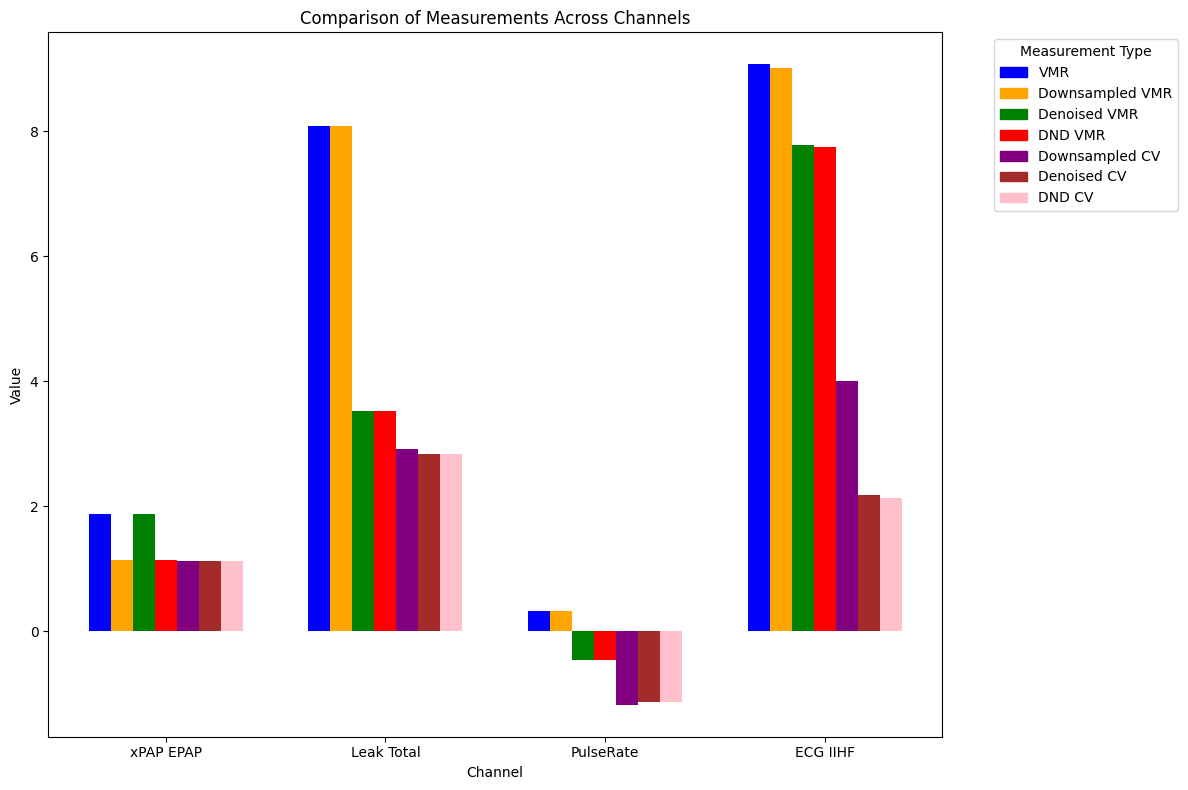

In [20]:
import matplotlib.patches as mpatches

channels = list(vmr.keys())

# Define width of each bar and spacing between clusters
bar_width = 0.1
cluster_spacing = 0.3

# Define labels and colors
labels = ['VMR', 'Downsampled VMR', 'Denoised VMR', 'DND VMR', 'Downsampled CV', 'Denoised CV', 'DND CV']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# X locations for the clusters
x = np.arange(4) * (len(labels) * bar_width + cluster_spacing)

# Plot bars for each channel
for i, channel in enumerate(channels[25:29]):
    # Values for the current channel
    values = [
        log_transform(vmr[channel]),
        log_transform(downsampled_vmr[channel]),
        log_transform(denoised_vmr[channel]),
        log_transform(dnd_vmr[channel]),
        log_transform(downsampled_cv[channel]),
        log_transform(denoised_cv[channel]),
        log_transform(dnd_cv[channel])
    ]
    
    # Plot bars with adjusted positions for each channel
    bar_positions = x[i] + np.arange(len(labels)) * bar_width
    ax.bar(bar_positions, values, bar_width, label=f'Channel: {channel}', color=colors)

# Set x-ticks and labels
ax.set_xticks(x + (len(labels) - 1) * bar_width / 2)
ax.set_xticklabels(channels[25:29])
ax.set_xlabel('Channel')
ax.set_ylabel('Value')
ax.set_title('Comparison of Measurements Across Channels')

legend_patches = [mpatches.Patch(color=colors[j], label=labels[j]) for j in range(len(labels))]
ax.legend(handles=legend_patches, title='Measurement Type', bbox_to_anchor=(1.05, 1), loc='upper left')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

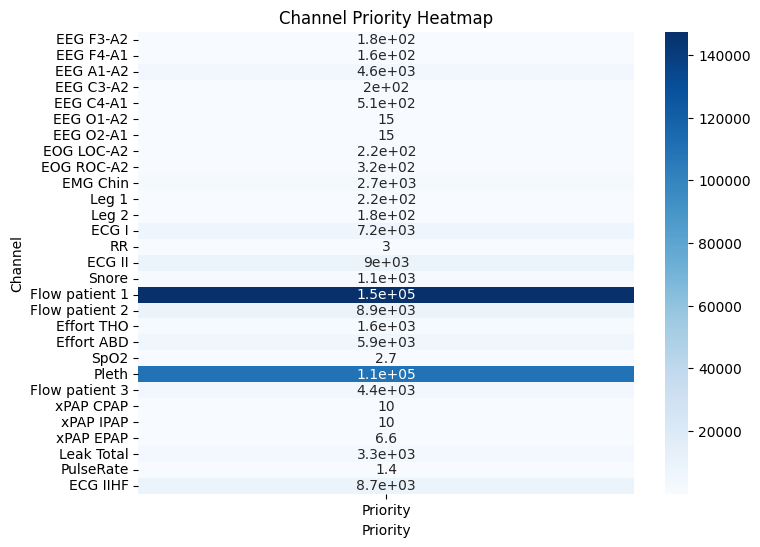

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example dictionary of channels and their priorities
# channel_priorities = {
#     'Channel 1': 7,
#     'Channel 2': 3,
#     'Channel 3': 9,
#     'Channel 4': 5,
#     'Channel 5': 6
# }

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(vmr, orient='index', columns=['Priority'])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap='Blues', linewidths=0)

# Set title and labels
plt.title('Channel Priority Heatmap')
plt.xlabel('Priority')
plt.ylabel('Channel')

# Show the plot
plt.show()


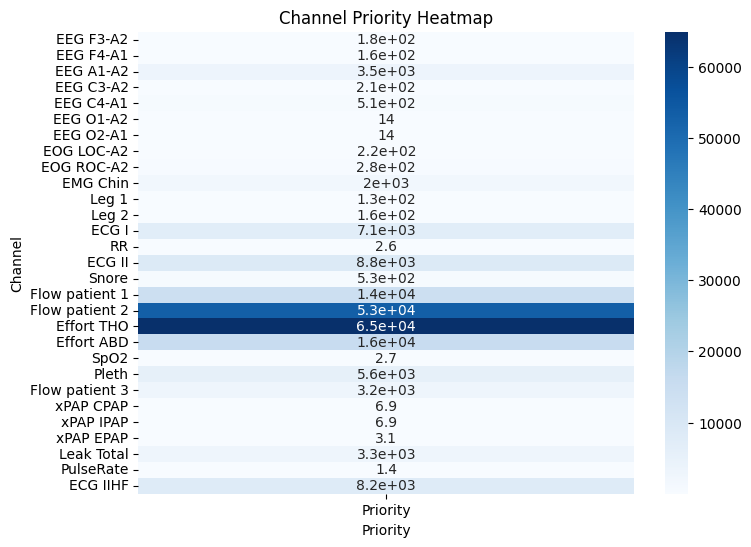

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example dictionary of channels and their priorities
# channel_priorities = {
#     'Channel 1': 7,
#     'Channel 2': 3,
#     'Channel 3': 9,
#     'Channel 4': 5,
#     'Channel 5': 6
# }

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(downsampled_vmr, orient='index', columns=['Priority'])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap='Blues', linewidths=0)

# Set title and labels
plt.title('Channel Priority Heatmap')
plt.xlabel('Priority')
plt.ylabel('Channel')

# Show the plot
plt.show()


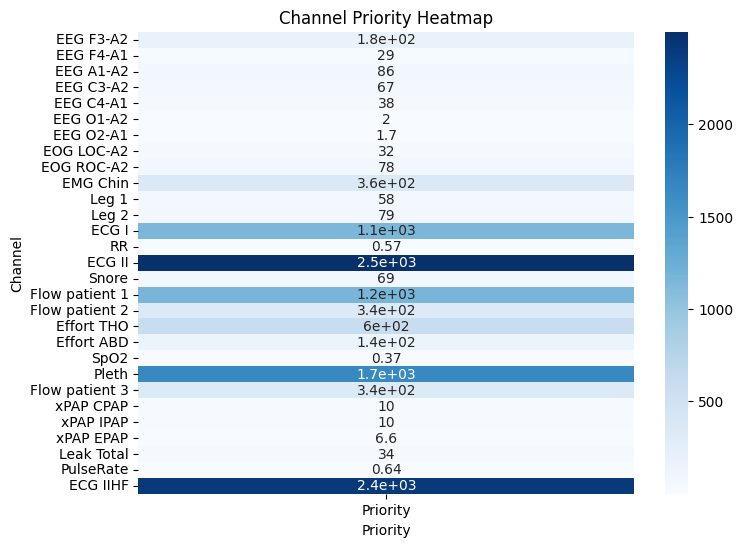

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example dictionary of channels and their priorities
# channel_priorities = {
#     'Channel 1': 7,
#     'Channel 2': 3,
#     'Channel 3': 9,
#     'Channel 4': 5,
#     'Channel 5': 6
# }

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(denoised_vmr, orient='index', columns=['Priority'])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap='Blues', linewidths=0)

# Set title and labels
plt.title('Channel Priority Heatmap')
plt.xlabel('Priority')
plt.ylabel('Channel')

# Show the plot
plt.show()


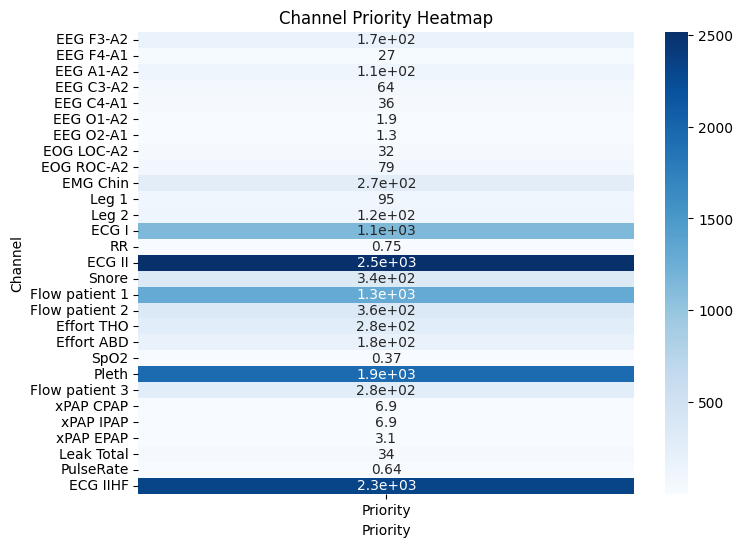

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example dictionary of channels and their priorities
# channel_priorities = {
#     'Channel 1': 7,
#     'Channel 2': 3,
#     'Channel 3': 9,
#     'Channel 4': 5,
#     'Channel 5': 6
# }

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(dnd_vmr, orient='index', columns=['Priority'])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap='Blues', linewidths=0)

# Set title and labels
plt.title('Channel Priority Heatmap')
plt.xlabel('Priority')
plt.ylabel('Channel')

# Show the plot
plt.show()


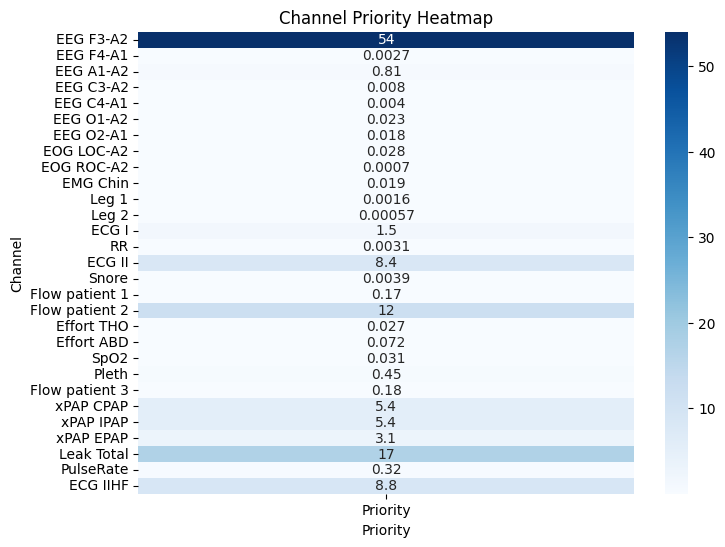

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example dictionary of channels and their priorities
# channel_priorities = {
#     'Channel 1': 7,
#     'Channel 2': 3,
#     'Channel 3': 9,
#     'Channel 4': 5,
#     'Channel 5': 6
# }

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(denoised_cv, orient='index', columns=['Priority'])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap='Blues', linewidths=0)

# Set title and labels
plt.title('Channel Priority Heatmap')
plt.xlabel('Priority')
plt.ylabel('Channel')

# Show the plot
plt.show()


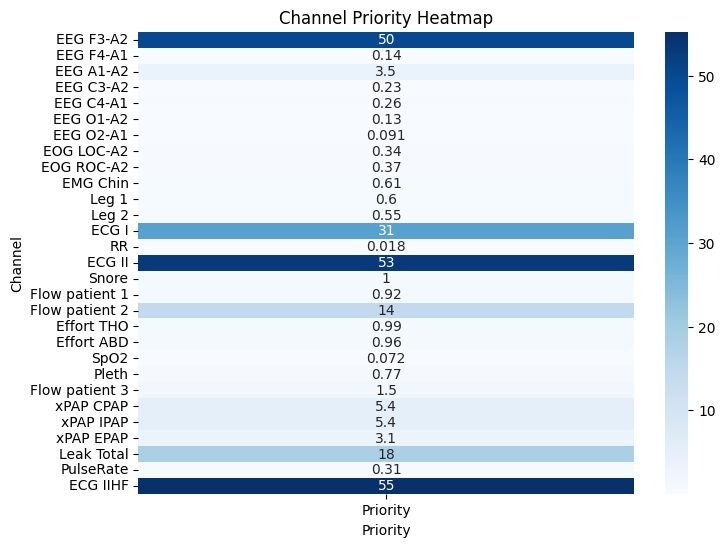

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example dictionary of channels and their priorities
# channel_priorities = {
#     'Channel 1': 7,
#     'Channel 2': 3,
#     'Channel 3': 9,
#     'Channel 4': 5,
#     'Channel 5': 6
# }

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(downsampled_cv, orient='index', columns=['Priority'])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap='Blues', linewidths=0)

# Set title and labels
plt.title('Channel Priority Heatmap')
plt.xlabel('Priority')
plt.ylabel('Channel')

# Show the plot
plt.show()


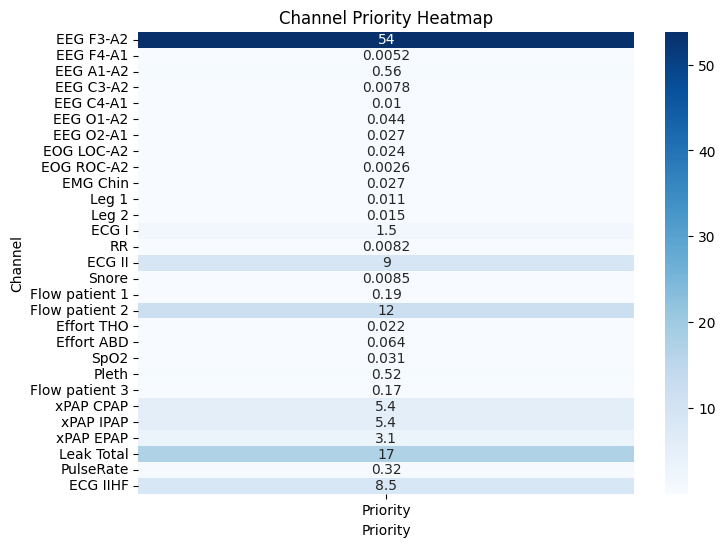

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example dictionary of channels and their priorities
# channel_priorities = {
#     'Channel 1': 7,
#     'Channel 2': 3,
#     'Channel 3': 9,
#     'Channel 4': 5,
#     'Channel 5': 6
# }

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(dnd_cv, orient='index', columns=['Priority'])

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap='Blues', linewidths=0)

# Set title and labels
plt.title('Channel Priority Heatmap')
plt.xlabel('Priority')
plt.ylabel('Channel')

# Show the plot
plt.show()


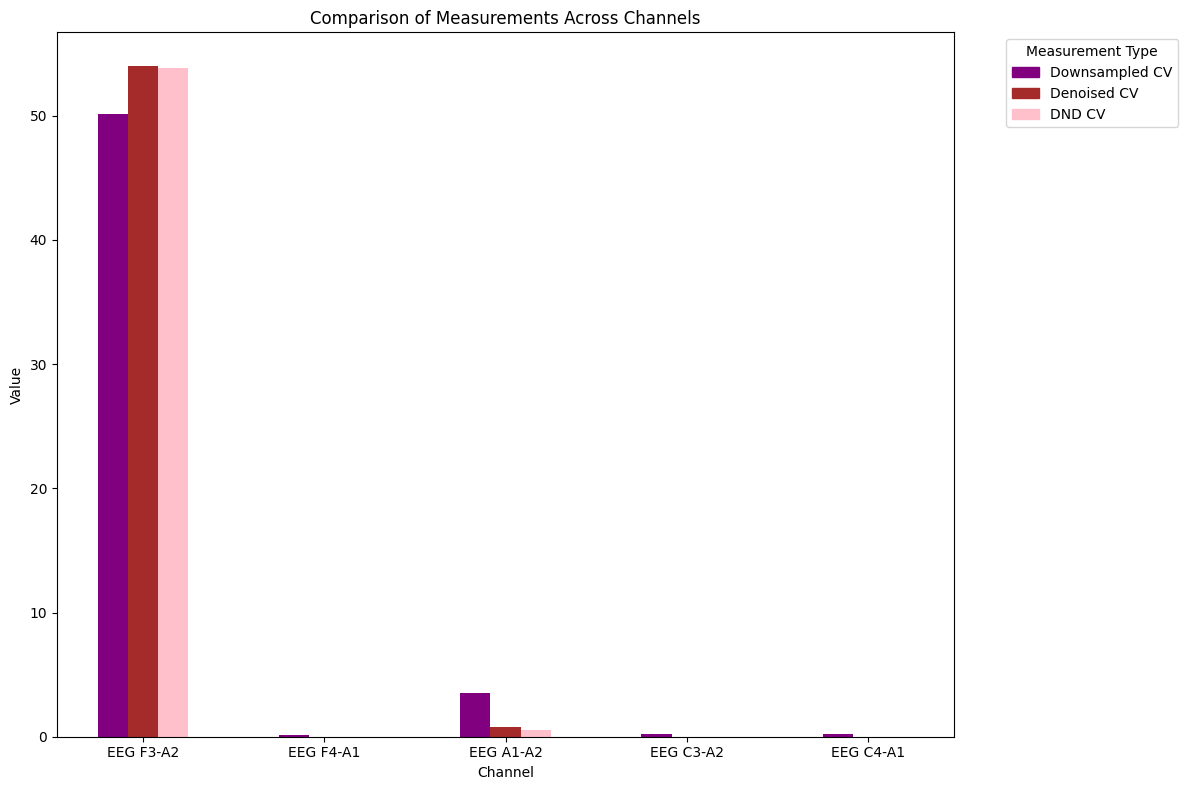

In [51]:
import matplotlib.patches as mpatches

channels = list(vmr.keys())

# Define width of each bar and spacing between clusters
bar_width = 0.1
cluster_spacing = 0.3

# Define labels and colors
labels = ['Downsampled CV', 'Denoised CV', 'DND CV']
colors = ['purple', 'brown', 'pink']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# X locations for the clusters
x = np.arange(5) * (len(labels) * bar_width + cluster_spacing)

# Plot bars for each channel
for i, channel in enumerate(channels[:5]):
    # Values for the current channel
    values = [
        downsampled_cv[channel],
        denoised_cv[channel],
        dnd_cv[channel]
    ]
    
    # Plot bars with adjusted positions for each channel
    bar_positions = x[i] + np.arange(len(labels)) * bar_width
    ax.bar(bar_positions, values, bar_width, label=f'Channel: {channel}', color=colors)

# Set x-ticks and labels
ax.set_xticks(x + (len(labels) - 1) * bar_width / 2)
ax.set_xticklabels(channels[:5])
ax.set_xlabel('Channel')
ax.set_ylabel('Value')
ax.set_title('Comparison of Measurements Across Channels')
legend_patches = [mpatches.Patch(color=colors[j], label=labels[j]) for j in range(len(labels))]
ax.legend(handles=legend_patches, title='Measurement Type', bbox_to_anchor=(1.05, 1), loc='upper left')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

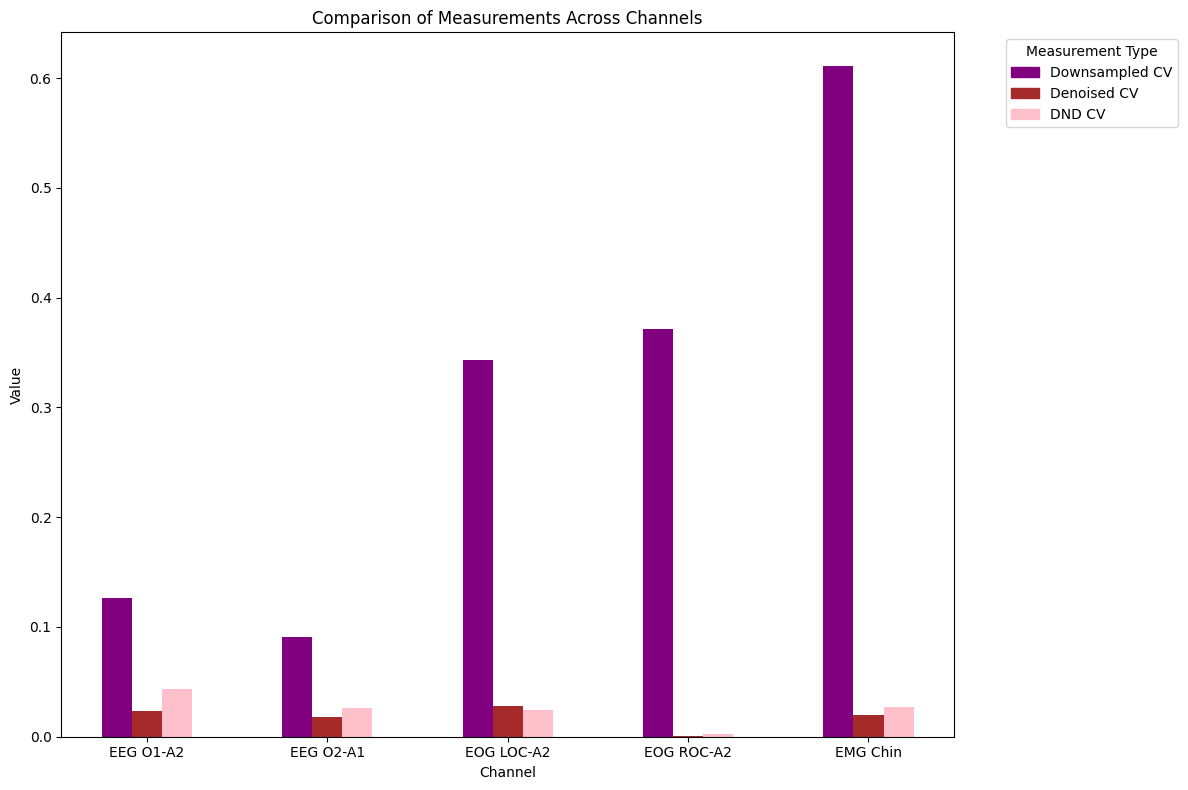

In [53]:
import matplotlib.patches as mpatches

channels = list(vmr.keys())

# Define width of each bar and spacing between clusters
bar_width = 0.1
cluster_spacing = 0.3

# Define labels and colors
labels = ['Downsampled CV', 'Denoised CV', 'DND CV']
colors = ['purple', 'brown', 'pink']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# X locations for the clusters
x = np.arange(5) * (len(labels) * bar_width + cluster_spacing)

# Plot bars for each channel
for i, channel in enumerate(channels[5:10]):
    # Values for the current channel
    values = [
        downsampled_cv[channel],
        denoised_cv[channel],
        dnd_cv[channel]
    ]
    
    # Plot bars with adjusted positions for each channel
    bar_positions = x[i] + np.arange(len(labels)) * bar_width
    ax.bar(bar_positions, values, bar_width, label=f'Channel: {channel}', color=colors)

# Set x-ticks and labels
ax.set_xticks(x + (len(labels) - 1) * bar_width / 2)
ax.set_xticklabels(channels[5:10])
ax.set_xlabel('Channel')
ax.set_ylabel('Value')
ax.set_title('Comparison of Measurements Across Channels')
legend_patches = [mpatches.Patch(color=colors[j], label=labels[j]) for j in range(len(labels))]
ax.legend(handles=legend_patches, title='Measurement Type', bbox_to_anchor=(1.05, 1), loc='upper left')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

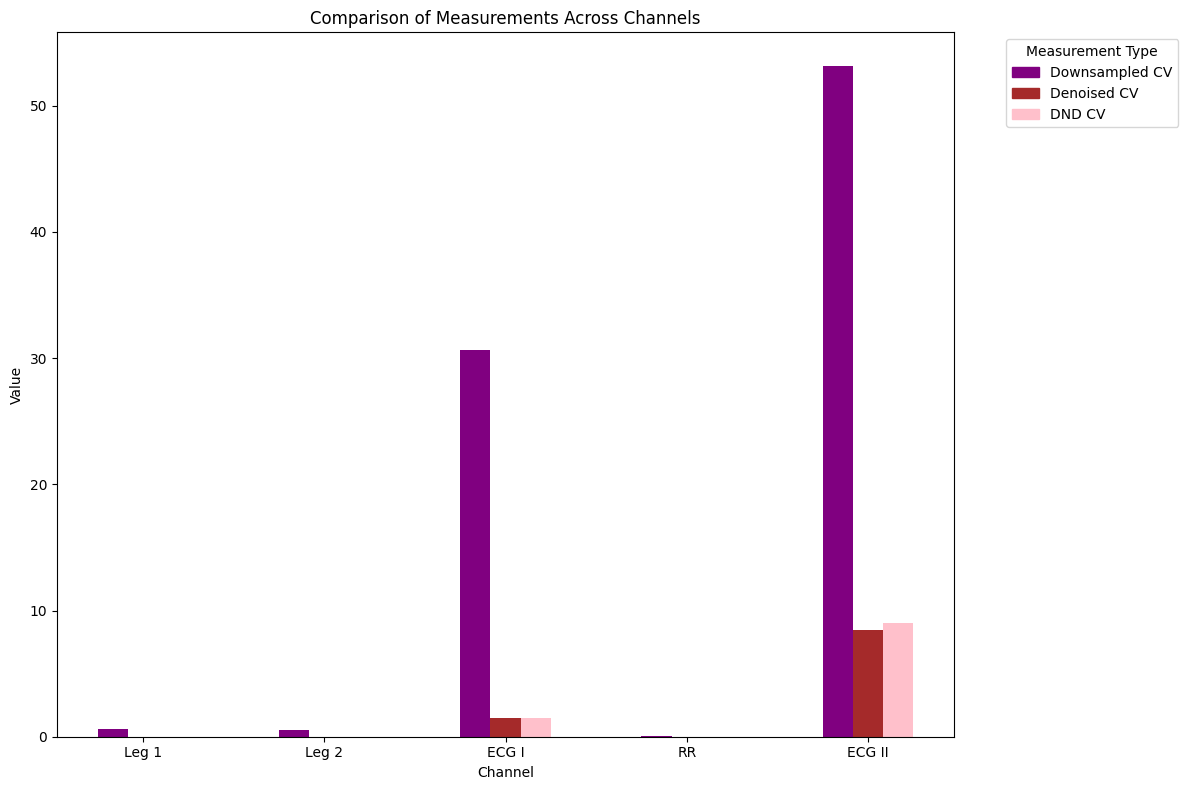

In [54]:
import matplotlib.patches as mpatches

channels = list(vmr.keys())

# Define width of each bar and spacing between clusters
bar_width = 0.1
cluster_spacing = 0.3

# Define labels and colors
labels = ['Downsampled CV', 'Denoised CV', 'DND CV']
colors = ['purple', 'brown', 'pink']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# X locations for the clusters
x = np.arange(5) * (len(labels) * bar_width + cluster_spacing)

# Plot bars for each channel
for i, channel in enumerate(channels[10:15]):
    # Values for the current channel
    values = [
        downsampled_cv[channel],
        denoised_cv[channel],
        dnd_cv[channel]
    ]
    
    # Plot bars with adjusted positions for each channel
    bar_positions = x[i] + np.arange(len(labels)) * bar_width
    ax.bar(bar_positions, values, bar_width, label=f'Channel: {channel}', color=colors)

# Set x-ticks and labels
ax.set_xticks(x + (len(labels) - 1) * bar_width / 2)
ax.set_xticklabels(channels[10:15])
ax.set_xlabel('Channel')
ax.set_ylabel('Value')
ax.set_title('Comparison of Measurements Across Channels')
legend_patches = [mpatches.Patch(color=colors[j], label=labels[j]) for j in range(len(labels))]
ax.legend(handles=legend_patches, title='Measurement Type', bbox_to_anchor=(1.05, 1), loc='upper left')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

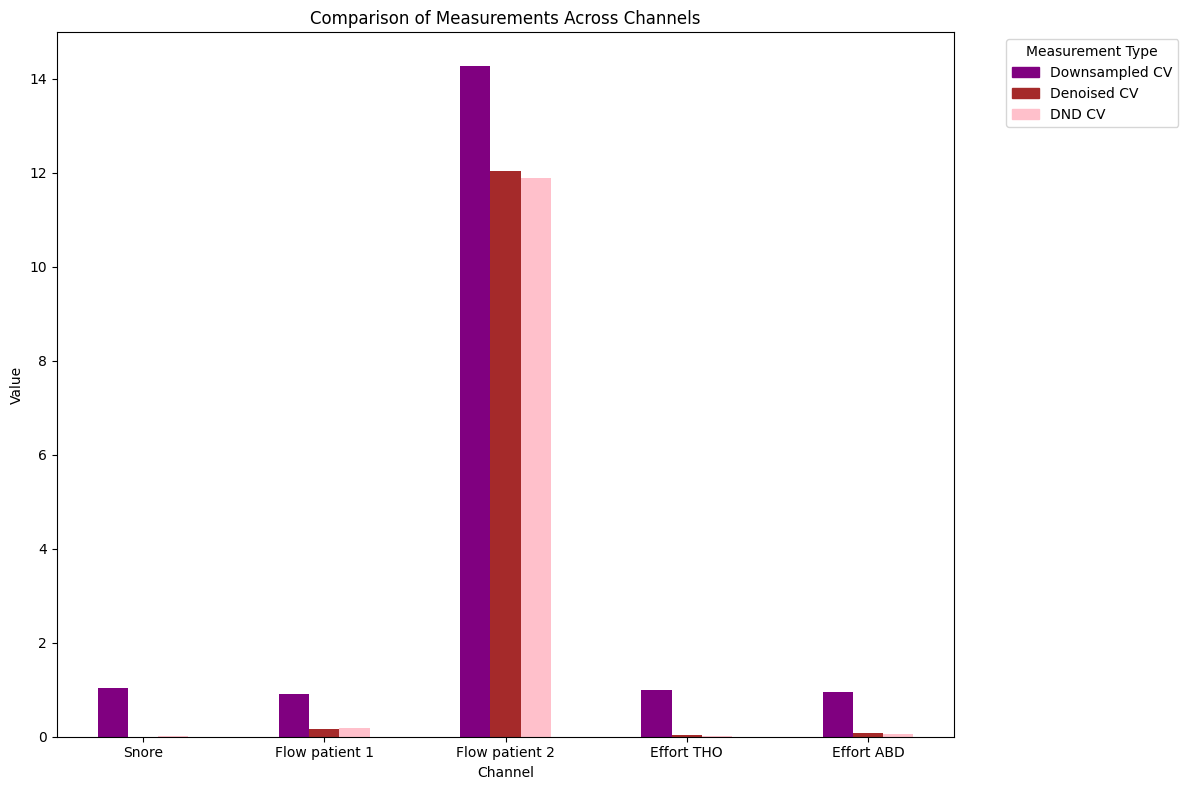

In [55]:
import matplotlib.patches as mpatches

channels = list(vmr.keys())

# Define width of each bar and spacing between clusters
bar_width = 0.1
cluster_spacing = 0.3

# Define labels and colors
labels = ['Downsampled CV', 'Denoised CV', 'DND CV']
colors = ['purple', 'brown', 'pink']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# X locations for the clusters
x = np.arange(5) * (len(labels) * bar_width + cluster_spacing)

# Plot bars for each channel
for i, channel in enumerate(channels[15:20]):
    # Values for the current channel
    values = [
        downsampled_cv[channel],
        denoised_cv[channel],
        dnd_cv[channel]
    ]
    
    # Plot bars with adjusted positions for each channel
    bar_positions = x[i] + np.arange(len(labels)) * bar_width
    ax.bar(bar_positions, values, bar_width, label=f'Channel: {channel}', color=colors)

# Set x-ticks and labels
ax.set_xticks(x + (len(labels) - 1) * bar_width / 2)
ax.set_xticklabels(channels[15:20])
ax.set_xlabel('Channel')
ax.set_ylabel('Value')
ax.set_title('Comparison of Measurements Across Channels')
legend_patches = [mpatches.Patch(color=colors[j], label=labels[j]) for j in range(len(labels))]
ax.legend(handles=legend_patches, title='Measurement Type', bbox_to_anchor=(1.05, 1), loc='upper left')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

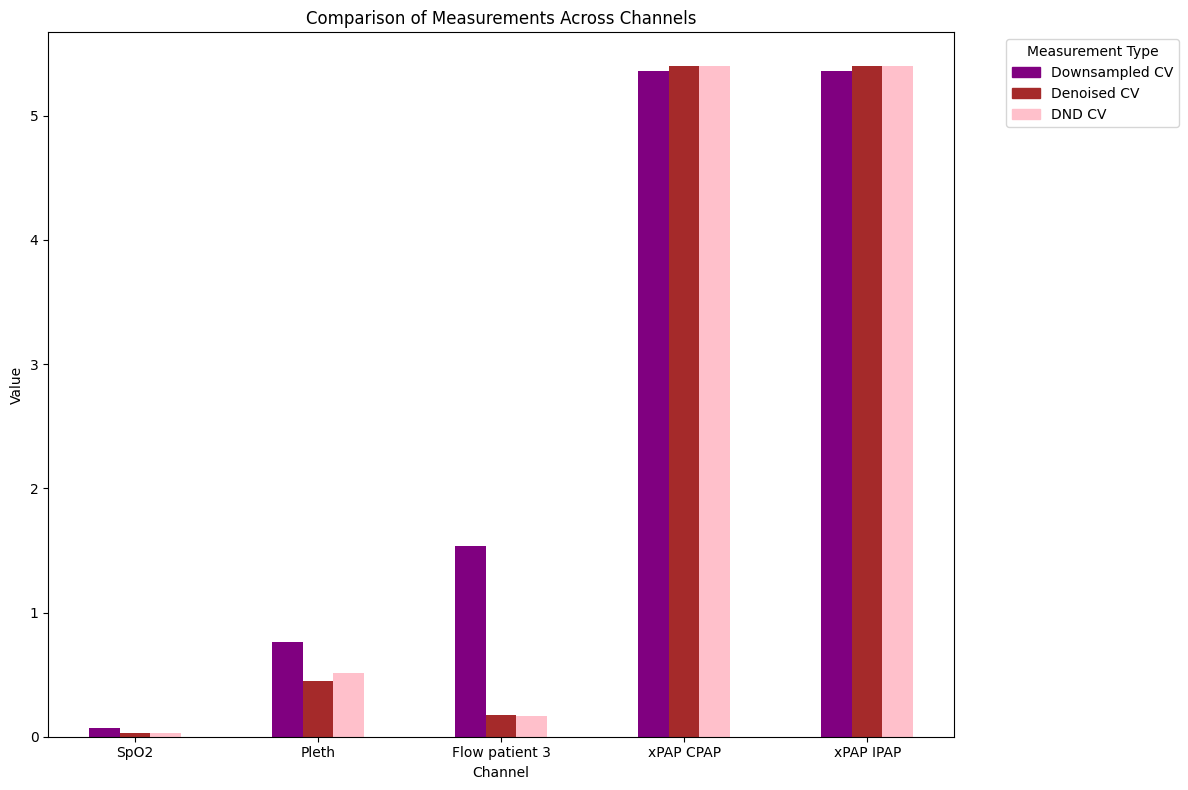

In [56]:
import matplotlib.patches as mpatches

channels = list(vmr.keys())

# Define width of each bar and spacing between clusters
bar_width = 0.1
cluster_spacing = 0.3

# Define labels and colors
labels = ['Downsampled CV', 'Denoised CV', 'DND CV']
colors = ['purple', 'brown', 'pink']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# X locations for the clusters
x = np.arange(5) * (len(labels) * bar_width + cluster_spacing)

# Plot bars for each channel
for i, channel in enumerate(channels[20:25]):
    # Values for the current channel
    values = [
        downsampled_cv[channel],
        denoised_cv[channel],
        dnd_cv[channel]
    ]
    
    # Plot bars with adjusted positions for each channel
    bar_positions = x[i] + np.arange(len(labels)) * bar_width
    ax.bar(bar_positions, values, bar_width, label=f'Channel: {channel}', color=colors)

# Set x-ticks and labels
ax.set_xticks(x + (len(labels) - 1) * bar_width / 2)
ax.set_xticklabels(channels[20:25])
ax.set_xlabel('Channel')
ax.set_ylabel('Value')
ax.set_title('Comparison of Measurements Across Channels')
legend_patches = [mpatches.Patch(color=colors[j], label=labels[j]) for j in range(len(labels))]
ax.legend(handles=legend_patches, title='Measurement Type', bbox_to_anchor=(1.05, 1), loc='upper left')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

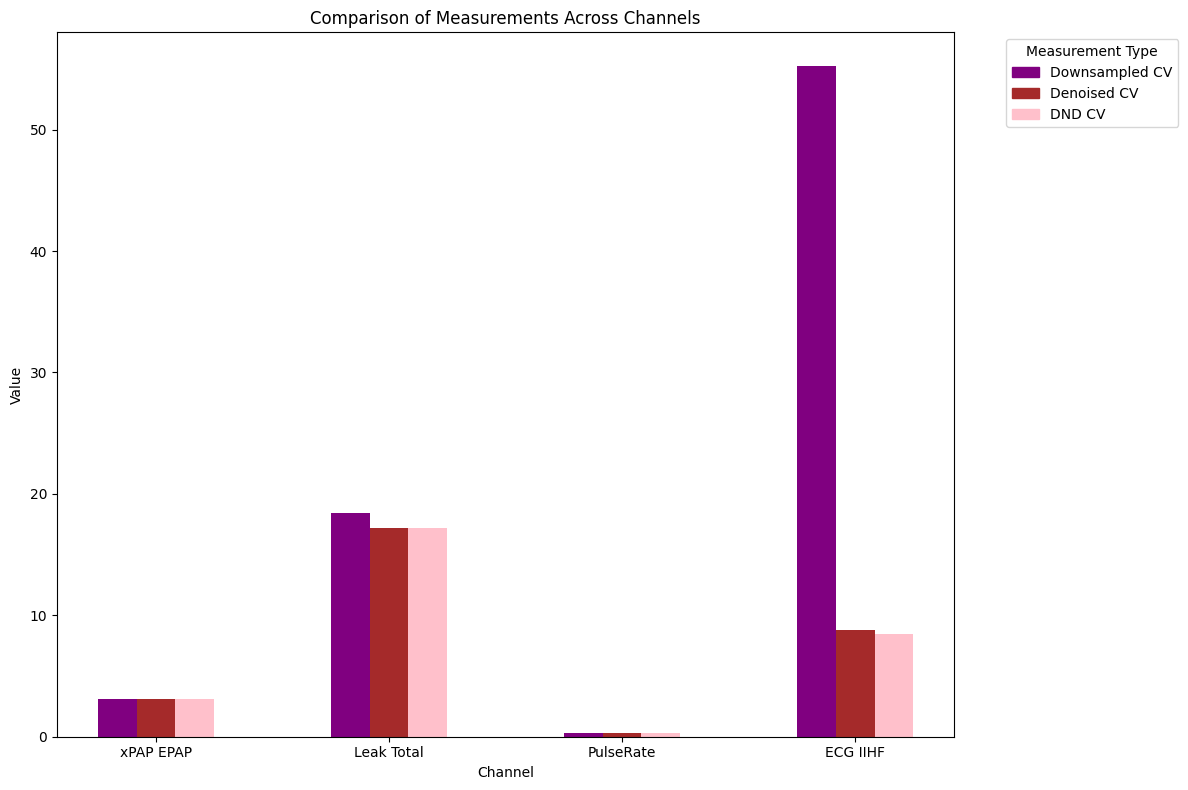

In [58]:
import matplotlib.patches as mpatches

channels = list(vmr.keys())

# Define width of each bar and spacing between clusters
bar_width = 0.1
cluster_spacing = 0.3

# Define labels and colors
labels = ['Downsampled CV', 'Denoised CV', 'DND CV']
colors = ['purple', 'brown', 'pink']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# X locations for the clusters
x = np.arange(4) * (len(labels) * bar_width + cluster_spacing)

# Plot bars for each channel
for i, channel in enumerate(channels[25:29]):
    # Values for the current channel
    values = [
        downsampled_cv[channel],
        denoised_cv[channel],
        dnd_cv[channel]
    ]
    
    # Plot bars with adjusted positions for each channel
    bar_positions = x[i] + np.arange(len(labels)) * bar_width
    ax.bar(bar_positions, values, bar_width, label=f'Channel: {channel}', color=colors)

# Set x-ticks and labels
ax.set_xticks(x + (len(labels) - 1) * bar_width / 2)
ax.set_xticklabels(channels[25:29])
ax.set_xlabel('Channel')
ax.set_ylabel('Value')
ax.set_title('Comparison of Measurements Across Channels')
legend_patches = [mpatches.Patch(color=colors[j], label=labels[j]) for j in range(len(labels))]
ax.legend(handles=legend_patches, title='Measurement Type', bbox_to_anchor=(1.05, 1), loc='upper left')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

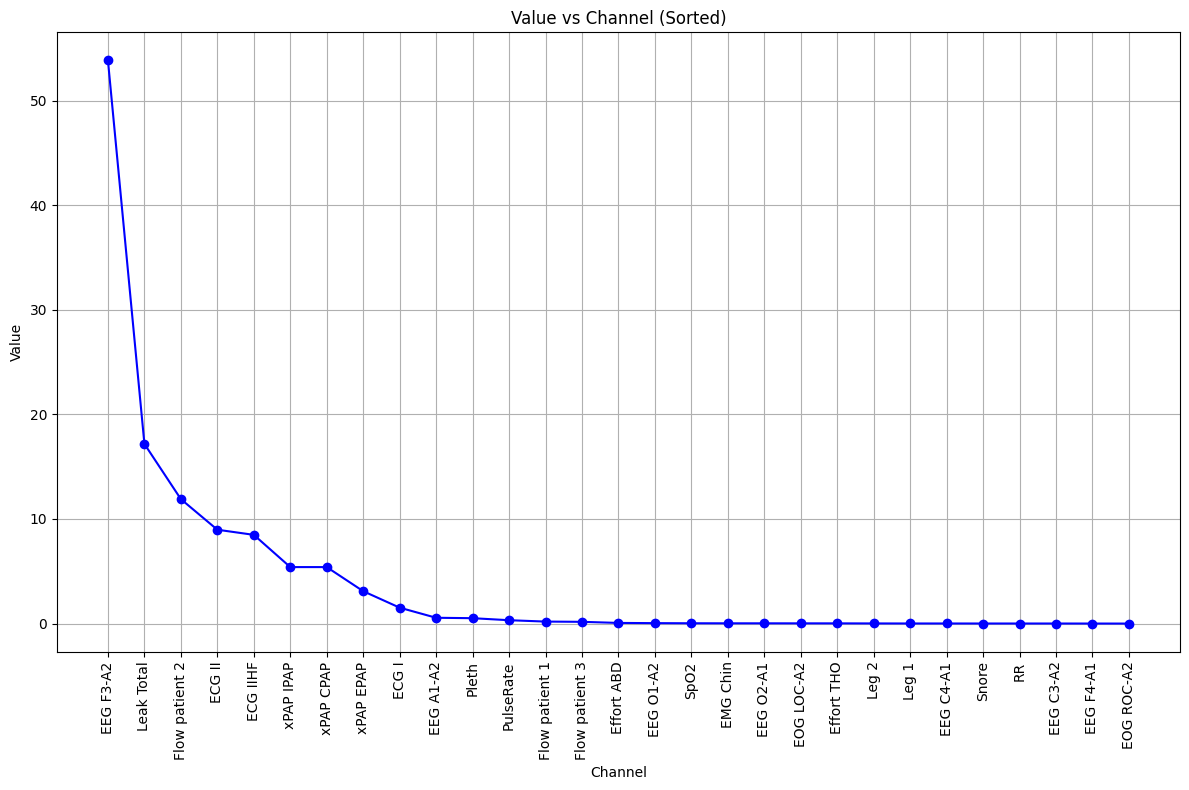

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
dnd_cv = {'EEG F3-A2': 53.825136677918756, 'EEG F4-A1': 0.0051804983743322704, 'EEG A1-A2': 0.5567234639219344, 'EEG C3-A2': 0.007822752881485241, 'EEG C4-A1': 0.010328257460724244, 'EEG O1-A2': 0.04364983389754938, 'EEG O2-A1': 0.026549120741346452, 'EOG LOC-A2': 0.023912876132953287, 'EOG ROC-A2': 0.002607387525969707, 'EMG Chin': 0.027297485039179777, 'Leg 1': 0.011107229428013631, 'Leg 2': 0.015389022630374912, 'ECG I': 1.5223713949124194, 'RR': 0.008237761336074914, 'ECG II': 8.973274593117392, 'Snore': 0.008503991482833756, 'Flow patient 1': 0.19301668601339816, 'Flow patient 2': 11.895927668253275, 'Effort THO': 0.022175786664820393, 'Effort ABD': 0.06404596479388612, 'SpO2': 0.031259879703929905, 'Pleth': 0.5166345977809575, 'Flow patient 3': 0.1691033209894254, 'xPAP CPAP': 5.401089628769526, 'xPAP IPAP': 5.401089628769526, 'xPAP EPAP': 3.0973138009039407, 'Leak Total': 17.172287722284526, 'PulseRate': 0.32338613666888216, 'ECG IIHF': 8.482694099200765}

# Convert dictionary to DataFrame
df_dnd_cv = pd.DataFrame(list(dnd_cv.items()), columns=['Channel', 'Value'])

# Sort DataFrame by 'Value' in descending order
df_dnd_cv_sorted = df_dnd_cv.sort_values(by='Value', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(df_dnd_cv_sorted['Channel'], df_dnd_cv_sorted['Value'], marker='o', linestyle='-', color='b')
plt.xticks(rotation=90)  # Rotate channel names for better readability
plt.xlabel('Channel')
plt.ylabel('Value')
plt.title('Value vs Channel (Sorted)')
plt.grid(True)
plt.tight_layout()
plt.show()
